### What is Time Series?
* A time series is a set of observations taken at specified times usually at equal intervals.                                        
* It is used to predict future values based on previous observed values.

### Components of Time Series

* Trend
* Seasonality
* Irregularity
* Cyclic

### When not to use Time Series?

* Values are constant
* Values in form of function

### What is Stationarity?

Stationarity have very strict criteria TS must have following things:
* Constant Mean
* Constant Variance
* Autocovariance doesnot depend on time

### Tests to Check Stationarity
1) Rolling Statistics:Plot moving average or moving variance and have insights whether it varies with time

2) ADCF(Augmented Dickey-fuller) Test: Null Hypothesis is that TS is nonstationary.The test results comprise of a test statistic & some critical values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,4

In [4]:
from datetime import datetime
dataset=pd.read_csv("HBL Historical Data.csv")

In [12]:
#parse strings to datetime type
dataset['Daily']=pd.to_datetime(dataset['Daily'], infer_datetime_format= True)
indexedDataset=dataset.set_index(['Daily'])
dataset.sort_values("Daily", axis = 0, ascending = True, 
                 inplace = True) 
dataset.head(5)

,Daily,Closing Price
715,2018-01-01,174.25
714,2018-01-02,179.67
713,2018-01-03,176.90
712,2018-01-04,181.70
711,2018-01-05,185.87


In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

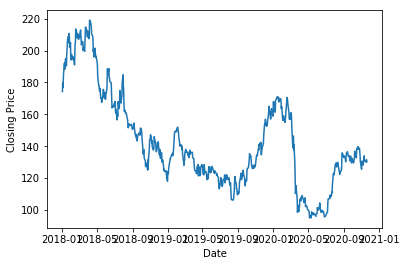

In [14]:
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.plot(indexedDataset)

In [15]:
#Determing rolling statistics
rolmean=indexedDataset.rolling(window=365).mean()
rolstd=indexedDataset.rolling(window=365).std()
print(rolmean,rolstd)

            Closing Price
Daily                    
2018-01-01            NaN
2018-01-02            NaN
2018-01-03            NaN
2018-01-04            NaN
2018-01-05            NaN
2018-01-08            NaN
2018-01-09            NaN
2018-01-10            NaN
2018-01-11            NaN
2018-01-12            NaN
2018-01-15            NaN
2018-01-16            NaN
2018-01-17            NaN
2018-01-18            NaN
2018-01-19            NaN
2018-01-22            NaN
2018-01-23            NaN
2018-01-24            NaN
2018-01-25            NaN
2018-01-26            NaN
2018-01-29            NaN
2018-01-30            NaN
2018-01-31            NaN
2018-02-01            NaN
2018-02-02            NaN
2018-02-06            NaN
2018-02-07            NaN
2018-02-08            NaN
2018-02-09            NaN
2018-02-12            NaN
...                   ...
2020-10-09     126.909068
2020-10-12     126.936685
2020-10-13     126.955589
2020-10-14     126.987315
2020-10-15     127.018000
2020-10-16  

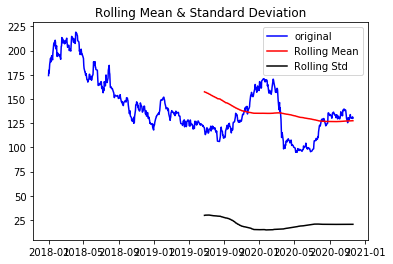

In [16]:
#plot rolling statistics
orig=plt.plot(indexedDataset,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [17]:
#Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of dickey-fuller test')
dftest=adfuller(indexedDataset['Closing Price'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)
                   

Results of dickey-fuller test
Test Statistics                 -1.658097
p-value                          0.452821
lags used                        1.000000
number of observations used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


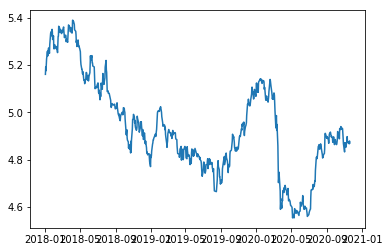

In [18]:
#Estimating Trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

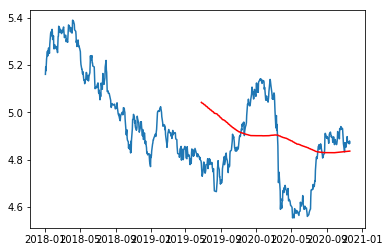

In [19]:
movingAverage=indexedDataset_logScale.rolling(window=365).mean()
movingSTD=indexedDataset_logScale.rolling(window=365).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [20]:
datasetlogScaleMinusmovingAverage=indexedDataset_logScale-movingAverage
datasetlogScaleMinusmovingAverage.head(20)

#Removing Nan Values
datasetlogScaleMinusmovingAverage.dropna(inplace=True)
datasetlogScaleMinusmovingAverage.head(20)


,Closing Price
Daily,
2019-06-25,-0.259628
2019-06-26,-0.282086
2019-06-27,-0.299198
2019-06-28,-0.308865
2019-07-01,-0.285969
2019-07-02,-0.272596
2019-07-03,-0.245278
2019-07-04,-0.243966
2019-07-05,-0.255201


In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing Rolling Statistics
    movingAverage=timeseries.rolling(window=365).mean()
    movingSTD=timeseries.rolling(window=365).std()
    
    #PLOT Rolling Statistics
    orig=plt.plot(indexedDataset,color='blue',label='original')
    mean=plt.plot(movingAverage,color='red',label='Rolling Mean')
    std=plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of dickey-fuller test')
    dftest=adfuller(timeseries['Closing Price'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    
    
    

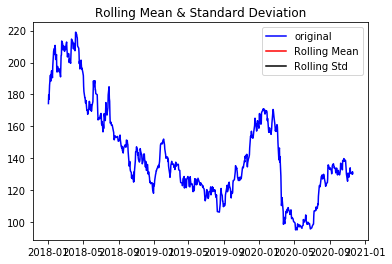

Results of dickey-fuller test
Test Statistics                 -1.598592
p-value                          0.484301
lags used                        1.000000
number of observations used    350.000000
Critical Value (1%)             -3.449173
Critical Value (5%)             -2.869833
Critical Value (10%)            -2.571188
dtype: float64


In [26]:
test_stationarity(datasetlogScaleMinusmovingAverage)

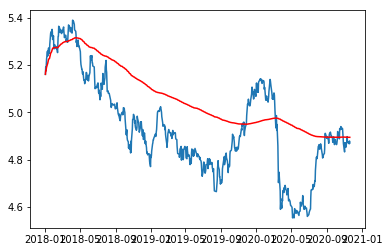

In [27]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=365,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

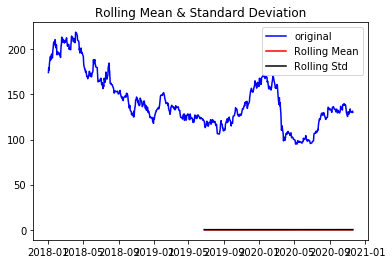

Results of dickey-fuller test
Test Statistics                 -2.212948
p-value                          0.201580
lags used                        1.000000
number of observations used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


In [28]:
datasetlogScaleMinusmovingExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetlogScaleMinusmovingExponentialDecayAverage)